# INTRODUCTION

In [38]:
import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

data = pd.read_csv(link, on_bad_lines='skip', index_col = 0)
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real;;
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.0,0.00,1533.95;;
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.0,2421.00,30000.00;;
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.0,220.00,45000.00;;
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.0,1.00,5000.00;;
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.0,1283.00,19500.00;;


In [25]:
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;'] # Nous permet de supprimer les trois 03 dernieres colonnes qui ne nous servent a rien 
data = data.drop(columns=columns_to_drop)

In [26]:
data = data.dropna()  # Enleve les lignes qui contiennent au moins une valeur manquante

In [27]:
print(data['goal']) # Le type ici est Object ce qui n'est pas bon car on veut des Float. pour se faire en mettant data['goal'].astype(float) on a une erreur car contient des element de la forme '2014-05-01 17:36:59' . On cherche alors par la suite a supprimer ces elements qui contiennent des "tirets < - > "

ID
1000002330      1000.00
1000003930     30000.00
1000004038     45000.00
1000007540      5000.00
1000011046     19500.00
                ...    
1448687698      1800.00
1448688798       600.00
1448696449      5000.00
1448702836     15000.00
1448719328    195000.00
Name: goal, Length: 77589, dtype: object


In [28]:
data = data[~data['goal'].str.contains('-')].copy()    # Cette syntaxe est utilisée pour supp les lignes ave c des tirets on assigne ensuite a data['goal'] puis on connvertit en float. ON    ajoute apes notre code .copy() pour eviter les erreurs et ne pas ecraser la valeur de data['goal'] initiale
data['goal'] = data['goal'].astype(float)

In [29]:
# On fait la meme chose avec les deux autres colonnes 'pledged' et 'backers' devant chacun etre respectivement des decimaux et des entiers N

data['pledged'] = data['pledged'].astype(float) # Argent promis qui peut avoir des centimes 19,99 euros et backers qui decompte le nombre de personne 
data['backers'] = data['backers'].astype(int)

In [30]:
masque = data['goal'] < 600000  # On cree un dataset plus petit avc des chiffres gerables 
data = data.loc[masque].copy()

In [33]:
# Pour connaitre les valeurs de "state"
  
'''Failed pour les projets qui n'ont pas atteint le quota d'argent requis
canceled pour les projets annulés
successful pour les projets qui ont atteints le montant requis
live pour les projets en cours 
suspended pour les projets suspendu
'''

data.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [35]:
# On ne s'interesse qu'aux projets succesful et failed

masque = (data['state'] == 'failed') | (data['state'] == 'successful')  # Ici on veu soit les projets qui ont soit echou", soit reussi
data = data.loc[masque].copy()
data = data.head(20000) # Lorsqu'on a de milliers de lignes on peut prendre un nombre de ligne au hasard parce que dans ce cas les 20000 premieres lignes peuvent avoir la meme syntaxe et par exple a partir de 40000 la syntaxe change on emploit donc la methode 'SAMPLE'


In [36]:
data.info();


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1000002330 to 113204057
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20000 non-null  object 
 1   category       20000 non-null  object 
 2   main_category  20000 non-null  object 
 3   currency       20000 non-null  object 
 4   deadline       20000 non-null  object 
 5   goal           20000 non-null  float64
 6   launched       20000 non-null  object 
 7   pledged        20000 non-null  float64
 8   state          20000 non-null  object 
 9   backers        20000 non-null  int64  
 10  country        20000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US


In [37]:
data.head()         # Rendu final

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US


# Moyenne, médiane et quantiles


+ Déterminer les variables numériques et les stocker dans un tableau num_data

In [38]:
num_data = data.select_dtypes(include=['int64','float64'])  # SELECT_DTYPES est une methode. On ne peut calculer la moyenne que sur les valeurs num
num_data

,goal,pledged,backers
ID,,,
1000002330,1000.0,0.0,0
1000003930,30000.0,2421.0,15
1000004038,45000.0,220.0,3
1000007540,5000.0,1.0,1
1000014025,50000.0,52375.0,224
...,...,...,...
1132019813,4000.0,4550.0,55
1132026580,1500.0,15.0,1
1132035662,35000.0,35912.0,367


+ Calculer la moyenne de chaque variable contenue dans num_data et les stocker dans un DataFrame stats avec comme unique colonne moyenne.
+ Comparer la moyenne des collectes (pledged) avec celle des objectifs fixés (goal). Que constatez-vous ?

> Pour la création du DataFrame stats, on pourra utiliser `pd.DataFrame` et l'attribut columns.
>
> Pour le calcul des moyennes, on pourra s'aider de `pandas.DataFrame.mean()`.

In [39]:
# Calcul de la moyenne de chaque variable contenue dans num_data
num_data.mean()

goal       17944.893169
pledged    10514.226824
backers      116.169950
dtype: float64

In [41]:
# Creation du DataFrame

stats = pd.DataFrame(num_data.mean(), columns=['moyenne'])
stats

,moyenne
goal,17944.893169
pledged,10514.226824
backers,116.169950


In [42]:
# Afficher seulement 2 chiffres significatifs.
stats.round(2)

,moyenne
goal,17944.89
pledged,10514.23
backers,116.17


In [46]:
moyenne_depart = np.mean([1,2,3,4,5,6,7,8,9,10])
moyenne_depart_exageree = np.mean([1,2,3,4,5,6,7,8,9,10,1000])
print('moyenne_depart', moyenne_depart)
print('moyenne_depart_exageree', moyenne_depart_exageree)
mediane_depart = np.median([1,2,3,4,5,6,7,8,9,10])
mediane_depart_exageree = np.median([1,2,3,4,5,6,7,8,9,10,1000])
print('mediane_depart', mediane_depart)
print('mediane_depart_exageree', mediane_depart_exageree)

moyenne_depart 5.5
moyenne_depart_exageree 95.9090909090909
mediane_depart 5.5
mediane_depart_exageree 6.0


La moyenne est une bonne entrée en matière, cependant elle ne permet pas d'avoir une répartition précise des données. Pour cela, la médiane est un indicateur plus précis.

Elle se définit ainsi : la médiane d'un ensemble de valeurs est la valeur x qui permet de couper l'ensemble des valeurs en deux parties égales : mettant d'un côté une moitié des valeurs, qui sont toutes inférieures ou égales à x et de l'autre côté l'autre moitié des valeurs, qui sont toutes supérieures ou égales à x (s'il y a un nombre impair de valeurs, la valeur centrale sera mise des deux côtés).

In [48]:
pd.DataFrame(num_data.median(), columns = ['median'])

,median
goal,5000.0
pledged,757.0
backers,15.0


In [49]:
stats['median'] = num_data.median()
stats

,moyenne,median
goal,17944.893169,5000.0
pledged,10514.226824,757.0
backers,116.169950,15.0


Malgré une moyenne élevée, **on constate que la moitié des objectifs fixés ne dépassent pas 5500€**.

De même pour les dons récoltés et le nombre de contributeurs qui ont respectivement la moitié en dessous de 600€ et 12 personnes.

**Cela laisse apparaître la présence de valeurs extrêmes qui tirent vers le haut la moyenne.**

+ On observe déjà la faiblesse d'un indicateur comme la moyenne qui est fortement influencée par les valeurs extrêmes.

In [51]:
stats['mean_med_diff'] = abs( stats['moyenne'] - stats['median'])
stats.round(2)


,moyenne,median,mean_med_diff
goal,17944.89,5000.0,12944.89
pledged,10514.23,757.0,9757.23
backers,116.17,15.0,101.17


Pour donner une interprétation de cette nouvelle variable, il faut bien avoir en tête les ordres de grandeur de chaque variable. Dans notre cas, on constate à travers la variable nouvellement créée que la médiane et la moyenne sont systématiquement très éloignées. Cela nous renseigne sur **l'hétérogénéité** des variables dont nous disposons. Il semble clairement qu'on dispose d'un nombre important de campagne de financement avec de petits montants et d'un nombre moindre de campagne avec de gros montants.

  

---



Pour confirmer notre analyse, il est nécessaire de regarder les **quantiles** de chaque variable.

  

> Les **quantiles** sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données.
De manière générale, on divise le jeu de données en 4 de telle sorte que le premier quantile renvoie la valeur à partir de laquelle on retrouve 25% des valeurs et ainsi de suite pour les autres quantiles.

In [58]:
num_data.quantile(q = [0.25,0.5,0.75]).transpose()

,0.25,0.50,0.75
goal,2000.0,5000.0,15000.00
pledged,50.0,757.0,4652.75
backers,2.0,15.0,62.00


In [59]:
num_data['goal'].quantile(q = [0.25,0.5,0.75]).transpose()

0.25     2000.0
0.50     5000.0
0.75    15000.0
Name: goal, dtype: float64

In [57]:
stats[['q1', 'q2', 'q3']] = num_data.quantile(q = [0.25,0.5,0.75]).transpose()
stats

,moyenne,median,mean_med_diff,q1,q2,q3
goal,17944.893169,5000.0,12944.893169,2000.0,5000.0,15000.00
pledged,10514.226824,757.0,9757.226824,50.0,757.0,4652.75
backers,116.169950,15.0,101.169950,2.0,15.0,62.00


> On peut compléter notre analyse en s'intéressant au min, max de chaque variable.  
> La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.

-   Ajouter au tableau  **`stats`**  3 colonnes  **`min`**,  **`max`**  et  **`min_max_diff`**  renseignant le min,le max et la différence des deux.

-  Que remarquez-vous sur la différence des deux ?

In [60]:
stats['min'] = num_data.min()
stats['max'] = num_data.max()
stats['min_max_diff'] = stats['max'] - stats['min']
stats

,moyenne,median,mean_med_diff,q1,q2,q3,min,max,min_max_diff
goal,17944.893169,5000.0,12944.893169,2000.0,5000.0,15000.00,1.0,575000.0,574999.0
pledged,10514.226824,757.0,9757.226824,50.0,757.0,4652.75,0.0,5545991.7,5545991.7
backers,116.169950,15.0,101.169950,2.0,15.0,62.00,0.0,85581.0,85581.0


# VARIANCE, ECART TYPE ET OUTLIERS



> Deux derniers indicateurs nous permettent d'avoir un bon aperçu :  **la variance**  et  **l'écart-type**.  
> Ils font partie de la famille des indicateurs de dispersion :
>
> > -   La variance, qui mesure la dispersion autour de la moyenne, c'est à dire à quel point les valeurs présentes dans une liste numérique sont écartées de la moyenne.
> >
> > -   L'écart type, qui se définit mathématiquement comme la racine carrée de la variance. De par sa construction,  **l’écart type**  est également une mesure de la dispersion des valeurs.
>
>   On peut calculer facilement l'écart type d'une variable en utilisant  `pandas.Series.std()`

-     Calculer  **l'écart type**  de la variable  **`backers`**.

-    Afficher l'intervalle  **moyenne**  +/-  **ecart type**  de la variable  **`backers`**.

In [61]:
ecart_type = num_data['backers'].std()  # STD est ce qui permet de calculer l'ecart type

intervalle = [num_data['backers'].mean() - ecart_type, num_data['backers'].mean() + ecart_type] # creer un intervalle qui est celui de la moyenne moins 
print(intervalle)

[np.float64(-860.1421576446683), np.float64(1092.4820576446682)]


>  On peut tout à fait tronquer l'intervalle à 0. Le nombre de backers est toujours positif.

-    Ajouter une nouvelle colonne intitulée  **`backers_in`**  à  **`num_data`**  contenant 1 si la valeur de  **`backers`**  appartiennent à l'intervalle calculé précédemment et 0 sinon.

Pour déterminer les valeurs qui appartiennent à l'intervalle calculé précédemment, on pourra s'aider de  `pandas.Series.between(int1,int2).astype(int)`.

Pour afficher les proportions on pourra s'aider de  `pandas.Series.value_counts(normalize = True)`.

In [63]:
num_data['backers_in'] = num_data['backers'].between(intervalle[0], intervalle[1]).astype(int)

num_data['backers_in'].value_counts(normalize=True)
# Tout ce qui est  al interieur de notre intervalle est a 98 pour cent et on a 0.1 pour cent hors de l"intervalle


backers_in
1    0.98365
0    0.01635
Name: proportion, dtype: float64

In [64]:
num_data.head(10)

,goal,pledged,backers,backers_in
ID,,,,
1000002330,1000.0,0.0,0,1
1000003930,30000.0,2421.0,15,1
1000004038,45000.0,220.0,3,1
1000007540,5000.0,1.0,1,1
1000014025,50000.0,52375.0,224,1
1000023410,1000.0,1205.0,16,1
1000030581,25000.0,453.0,40,1
100004721,2500.0,0.0,0,1
100005484,12500.0,12700.0,100,1


<Axes: xlabel='backers'>

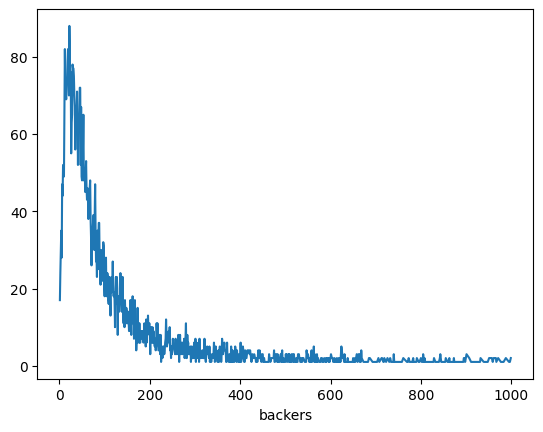

In [67]:
data[(data['state'] == "successful" ) & (data.backers<1000)].groupby('backers').size().plot()

## Analyse descriptive des variables qualitatives


L'analyse des variables qualitatives est une étape importante dans la compréhension des données.  
Elles sont souvent plus difficiles à manipuler et il est important d'observer leur relation avec les variables numériques.  
Elles livrent souvent des informations précieuses sur l'interaction entre les variables dans le jeu de données.

L'objectif de ce module est d'arriver à déterminer les modalités d'une variable qualitative et l'importance de chacune.  
Ce module vous permettra également de vous familiariser avec des méthodes simples de gestion de données.

> On repart de zéro

In [52]:
import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

data = pd.read_csv(link, on_bad_lines='skip', index_col = 0)
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;']
data = data.drop(columns=columns_to_drop)
data = data.dropna()
data = data[~data['goal'].str.contains('-')]
data['goal'] = data['goal'].astype(float)
data['pledged'] = data['pledged'].astype(float)
data['backers'] = data['backers'].astype(int)
values_to_remove = ['canceled', 'live', 'suspended']
data = data[~data['state'].isin(values_to_remove)]
data = data.head(20000)
masque = data['goal'] < 600000
data = data.loc[masque]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19882 entries, 1000002330 to 1131376350
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19882 non-null  object 
 1   category       19882 non-null  object 
 2   main_category  19882 non-null  object 
 3   currency       19882 non-null  object 
 4   deadline       19882 non-null  object 
 5   goal           19882 non-null  float64
 6   launched       19882 non-null  object 
 7   pledged        19882 non-null  float64
 8   state          19882 non-null  object 
 9   backers        19882 non-null  int64  
 10  country        19882 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB



-    Déterminer les variables catégorielles et les stocker dans un tableau  **`cat_data`**.

  On pourra s'aider de la fonction  `pandas.DataFrame.select_dtypes()`  et de l'attribut  `include`  auquel on renseignera une liste du ou des type(s) qu'on souhaite garder (ici 'O').

In [53]:
cat_data = data.select_dtypes(include= 'O') # La fonction include = 'o' permet der recuperer de facon auto les var categorielle
cat_data.head()

,name,category,main_category,currency,deadline,launched,state,country
ID,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,US



+ L'analyse descriptive des variables qualitatives fait appel à d'autres outils de  **`pandas`**.  
+ Une première question qu'on doit se poser quand on fait face à ce type de données est : Quelles sont les modalités de chaque variable et comment se répartissent elles ?

-     Afficher les modalités de la variable  **`main_category`**  avec leurs fréquences respectives.

-    Quelle est la variable la plus fréquente ?

  On pourra s'aider de  `pandas.Series.value_counts()`.

   `value_counts`  ne s'utilise pas sur des objets de type DataFrame.

In [54]:
cat_data['main_category'].value_counts() # Value counts nous donne les frequences par donnees.. on peut egalement y accedeer directement avec mode()


main_category
Film & Video    3365
Music           2519
Publishing      2087
Games           1850
Technology      1674
Art             1612
Design          1483
Food            1340
Fashion         1191
Comics           622
Photography      611
Theater          581
Crafts           498
Journalism       241
Dance            208
Name: count, dtype: int64

In [55]:
cat_data['main_category'].value_counts(normalize= True) # normalize = true donne les frequence et valuecounts simple donne  le nombre exact

main_category
Film & Video    0.169249
Music           0.126698
Publishing      0.104969
Games           0.093049
Technology      0.084197
Art             0.081078
Design          0.074590
Food            0.067398
Fashion         0.059903
Comics          0.031285
Photography     0.030731
Theater         0.029222
Crafts          0.025048
Journalism      0.012122
Dance           0.010462
Name: proportion, dtype: float64


 **`value_counts`**  est couramment utilisé pour visualiser très rapidement les modalités d'une variable qualitative.  
 On peut également retrouver très facilement la modalité la plus fréquente d'une variable qualitative : la méthode  **`mode`**  permet de récupérer l'élément le plus fréquent à l'intérieur d'une  **`pandas.Series`**.

-    Utiliser la méthode  **`mode`**  pour récupérer la modalité la plus fréquente de  **`main_category`**.

-    Vérifier que cela correspond bien avec le  **`value_counts`**  exécuté précédemment.

In [56]:
cat_data['main_category'].mode()

0    Film & Video
Name: main_category, dtype: object


+ Dans ce jeu de données, nous disposons d'une variable binaire  **`state`**  qui renseigne sur la réussite ou l'échec de la collecte.  
+ Ces variables sont généralement très intéressantes à étudier et livrent des informations précieuses sur les jeux de données. Il est important de bien les identifier et d'étudier dans un premier temps la fréquence des modalités.

-  Afficher les fréquences des modalités de la variable  **`state`**.

In [15]:
#Afficher les fréquences des modalités de la variable  **`state`**.
cat_data['state'].value_counts(normalize= True)

state
failed        0.594457
successful    0.405543
Name: proportion, dtype: float64


> On constate que 60% des collectes ont échouées.  
> Ce chiffre a peu d'intérêt si on ne le met pas en perspective avec le montant des objectifs fixés.  
> L'objectif est de faire une sorte de cartographie : 60% des collectes ont échoué mais quelles collectes sont concernées ? Les grosses ? Les petites ? Les deux ?
>
> Pour avoir une première idée, il est nécessaire de se munir du jeu de données complet  **`data`**  et d'utiliser les outils  **`groupby`**  et  **`agg`**  qui s'utilisent aussi bien sur les DataFrames que sur les Series.
>
> Tout d'abord dans une nouvelle variable  **`goal_classes`**, découpez les montants cibles (**`goal`**) en 4 classes distinctes avec pour labels 0, 1, 2, 3 selon les 3 quantiles de la nouvelle variable créée.
>
>   Il est fortement conseillé d'utiliser  `pandas.qcut()` .

In [57]:
data['goal_classes'] = pd.qcut(data['goal'], labels=[0,1,2,3,], q=4)
data['goal_classes']

ID
1000002330    0
1000003930    3
1000004038    3
1000007540    1
1000014025    3
             ..
1131350525    1
1131353743    2
1131355704    0
1131356728    1
1131376350    3
Name: goal_classes, Length: 19882, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


En utilisant  **`groupby`**  et  **`agg`**, stocker dans  **`state_summary`**  le nombre de projets en fonction des variables  **`goal_classes`**  et  **`state`**.

   _Exemple d'utilisation_  :  `df.groupby(['Age','sex']).size()`.

In [58]:
state_summary = data.groupby(['goal_classes', 'state']).size()
state_summary

C:\Users\Sergi\AppData\Local\Temp\ipykernel_23712\958343485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = data.groupby(['goal_classes', 'state']).size()


goal_classes  state     
0             failed        2691
              successful    2872
1             failed        2684
              successful    2092
2             failed        2930
              successful    1930
3             failed        3514
              successful    1169
dtype: int64

> Le montant en lui-même ne nous apporte aucune information.
Il faut l'affiner en le présentant par exemple sous forme de pourcentage.

In [59]:
# Exécuter la cellule de code suivante (**une seule fois**). ⬇️
state_summary = data.groupby(['goal_classes', 'state']).size() / data.groupby(['goal_classes']).size() 
# Ou encore state_summary = state_summary/data.groupby("goal_classes").size() mais ca met une erreur 
state_summary

C:\Users\Sergi\AppData\Local\Temp\ipykernel_23712\3516512124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = data.groupby(['goal_classes', 'state']).size() / data.groupby(['goal_classes']).size()
C:\Users\Sergi\AppData\Local\Temp\ipykernel_23712\3516512124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = data.groupby(['goal_classes', 'state']).size() / data.groupby(['goal_classes']).size()


goal_classes  state     
0             failed        0.483732
              successful    0.516268
1             failed        0.561977
              successful    0.438023
2             failed        0.602881
              successful    0.397119
3             failed        0.750374
              successful    0.249626
dtype: float64

> state_summary affiche désormais les pourcentages de réussite ou d'échec suivant les quartiles où on se place.

+ Que remarquez-vous ?

+ Ajouter à state_summary l'information relative au champ backers.

In [60]:
# On remarque que la proba
backers_summary = data.groupby(['goal_classes', 'state']).agg({'backers': 'mean'})
backers_summary

C:\Users\Sergi\AppData\Local\Temp\ipykernel_23712\6501405.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  backers_summary = data.groupby(['goal_classes', 'state']).agg({'backers': 'mean'})


backers
goal_classes state                 
0            failed        3.952434
             successful   51.481546
1            failed        8.514158
             successful  123.885277
2            failed       15.953584
             successful  328.988083
3            failed       27.540694
             successful  938.322498

In [61]:
# pour le quantile de 0 on remarque que les prejets qui ont echoué ont recu moins de soutient par rapport aux projets qui ont reussi et au fur et a mesure par quantile.
# On veut coller les deux dt on a :
pd.merge(
    state_summary.rename('state_percentage'),  # Sans mettre .rename() on obtine tune erreur car statesum est une serie et  et backsum nont  est un df 
    backers_summary,
    left_index=True,
    right_index=True
)


state_percentage     backers
goal_classes state                                   
0            failed              0.483732    3.952434
             successful          0.516268   51.481546
1            failed              0.561977    8.514158
             successful          0.438023  123.885277
2            failed              0.602881   15.953584
             successful          0.397119  328.988083
3            failed              0.750374   27.540694
             successful          0.249626  938.322498

In [62]:
print(type(state_summary))
print(type(backers_summary))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


> De manière purement analytique, nous avons décelé une information importante pour réussir son objectif de cagnotte : statistiquement, il semble qu'il ne faille pas fixer un objectif trop élevé à atteindre. Également, on remarquera que les campagnes qui sont un succès semblent réunir un nombre plus important de contributeurs.
>
> On peut poser une question légitime : Peut-on avoir une idée du montant objectif (**`goal`**) à fixer pour optimiser ses chances de réussir ?

-     Reprendre  **`data`**  et toujours en utilisant  **`groupby`**,**`agg`**  exprimer les montants cibles (**`goal`**) médians, moyens, minimum et maximum en fonction de  **`state`**  dans un DataFrame  **`target_goal`**.

In [63]:
data.groupby('state').agg({'goal':['median', 'mean', 'min', 'max']})          

goal                             
            median          mean  min       max
state                                          
failed      7000.0  23468.877064  1.0  575000.0
successful  4000.0   9776.168840  1.0  500000.0

+  En vous appuyant sur le module précédent (hétérogénéité, étendue des variables), est-il possible selon vous d'avoir une idée précise à priori du montant objectif à fixer pour réussir une collecte ?

In [ ]:
# a faire


> Il reste une dernière question importante à traiter : vers quelle(s) catégorie(s) dois-je me tourner si je souhaite maximiser ma collecte indépendamment de la réussir ou non ?  
> Pour répondre à cette question on utilisera les variables  **`main_category`**,**`pledged`**,**`backers`**.

-   En vous servant du module précédent et de ce qu'on a vu dans celui actuel, proposez une solution pour répondre à la question.

  On pourra regarder la collecte versée par les contributeurs pour chaque catégorie.

In [64]:
# @title
soluce = data.groupby(['main_category']).agg({'pledged': 'sum','backers': 'sum'})
soluce['pledged_per_backers'] = soluce['pledged']/soluce['backers']
soluce

,pledged,backers,pledged_per_backers
main_category,,,
Art,6518040.39,76716,84.963246
Comics,4588331.35,88215,52.013052
Crafts,1533321.62,16310,94.011135
Dance,722251.92,9639,74.930171
Design,40228418.14,406229,99.028918
Fashion,9505557.72,105912,89.749582
Film & Video,23541958.63,217314,108.331532
Food,9112744.99,90459,100.738953
Games,52164955.00,708048,73.674320


In [ ]:
# Resume a faire

# Corrélation

**Analyse des liaisons entre les variables d'un jeu de données**

L'analyse des liaisons entre variables passe par l'étude des corrélations entre elles.  
Il faut distinguer 3 niveaux d'analyse :

> -   entre les variables quantitatives,
>
> -   entre les variables qualitatives,
>
> -   entre les variables qualitatives et quantitatives.

Pour chaque niveau d'analyse, il faut répondre à cette question : y a-t-il dépendance ou indépendance entre les variables et dans quelle mesure ?

L'objectif de ce module est d'arriver à déterminer et mesurer les niveaux de corrélation entre les variables d'un jeu de données.

Commençons par la phase d'importation des packages.

In [65]:
import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

df = pd.read_csv(link, on_bad_lines='skip' , index_col = 0)
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;']
df = df.drop(columns=columns_to_drop)
df = df.dropna()
df = df[~df['goal'].str.contains('-')]
df['goal'] = df['goal'].astype(float)
df['pledged'] = df['pledged'].astype(float)
df['backers'] = df['backers'].astype(int)
masque = (df['state'] == 'failed') | (df['state'] == 'successful')
df = df.loc[masque]
df = df.head(20000)
df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1000002330 to 1131376350
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20000 non-null  object 
 1   category       20000 non-null  object 
 2   main_category  20000 non-null  object 
 3   currency       20000 non-null  object 
 4   deadline       20000 non-null  object 
 5   goal           20000 non-null  float64
 6   launched       20000 non-null  object 
 7   pledged        20000 non-null  float64
 8   state          20000 non-null  object 
 9   backers        20000 non-null  int64  
 10  country        20000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


### 1. Variables Quantitatives


----------

> Lorsque l'on parle de tests d'indépendance entre variables, il faut avoir en tête que les tests sont différents suivant que l'on dispose de variables qualitatives ou quantitatives.
>
> Pour tester l'indépendance de variables lorsque les variables sont quantitatives, le test de corrélation de  **Pearson**  s'impose.
>
> Un test statistique est une procédure de décision entre deux hypothèses. Il s'agit d'une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle  H<sub>0</sub>, en fonction d'un jeu de données.
>
>   **Attention nuance ! Ne pas rejeter une hypothèse ne signifie pas l'accepter.**
>
> Dans le cas du test de corrélation de  **Pearson**, l'hypothèse nulle est la suivante :
>
> H<sub>0</sub>  : "Les deux variables testées sont indépendantes"
>
> Pour rejeter ou non cette hypothèse, on regarde la  **p-value**  du test : i cette dernière est en dessous de 5%, on rejette  H<sub>0</sub>.  
> Le seuil de 5% est un usage de praticien. On peut mettre des seuils plus strictes (quand on teste un anti-missile) ou plus souple, pour de la publicité de masse.
>
> Il convient de définir la notion de  **p-value**  : la  **p-value**  est la probabilité, sous  H<sub>0</sub> , d’obtenir une statistique aussi extrême (pour ne pas dire aussi grande) que la valeur observée sur l’échantillon.  
> Elle représente la probabilité de rejeter l'hypothèse nulle si elle est vraie. Plus la  **p-value**  est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible.
>
> Pour mesurer la corrélation entre les deux variables, on s'appuiera sur le coefficient de corrélation de  **Pearson**.
>
> Le coefficient de corrélation de  **Pearson**  est une formule qui permet de quantifier la relation linéaire entre deux variables : le coefficient est un réel entre  `-1`  et  `1`  avec :
>
> > -   `1`  les variables sont corrélées
> >
> > -   `0`  les variables sont décorrélées
> >
> > -   `-1`  les variables sont corrélées négativement
>
> Des corrélations positives impliquent qu'à mesure que x augmente, il en va de même pour y. Les corrélations négatives impliquent que lorsque x augmente, y diminue.
>
> Le coefficient de  **Pearson**  est obtenu par la formule :
>
> Pearson correlation coefficient (ρ) = cov(X, Y) / (σX * σY)

>
> où :
>
> > -   cov(X,Y)  est la covariance entre  X  et  Y.
> >
> > -   σX  est l'écart type de  X.
> >
> > -   σY  est l'écart type de  Y.
>
> On peut récapituler le test de Pearson sous forme de tableau :
>
| Test              | p-value     | Décision         | Quantifieur      |
| ----------------- | ----------- | ---------------- | ---------------- |
| Test de Pearson   | < 5%        | On rejette H₀    | coefficient de Pearson |

>
> **`scipy.stats.pearsonr`**  permet de réaliser le test sur deux variables quantitatives. Il renvoie le  **coefficient**  et la  **p-value**  du test.

-   **(a)**  Importer de  **`scipy.stats`**  la fonction  **`pearsonr`**  .

-   **(b)**  Effectuer le test de corrélation de Pearson entre les deux variables  **`backers`**  et  **`pledged`**, afficher le  **`coefficient`**  et la  **`p-value`**  du test.

-   **(c)**  Les deux variables sont-elles corrélées ? Si oui, dans quelle mesure ?

In [66]:
# Import la fonction scipy
from scipy.stats import pearsonr

pearsonr(df['backers'], df['pledged'])

PearsonRResult(statistic=np.float64(0.7728630182807681), pvalue=np.float64(0.0))

In [67]:
pd.DataFrame(pearsonr(df['backers'], df['pledged']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,0.772863
p-value,0.000000



> On peut vérifier cette relation également graphiquement.

-   **(d)**  Exécuter la cellule suivante.

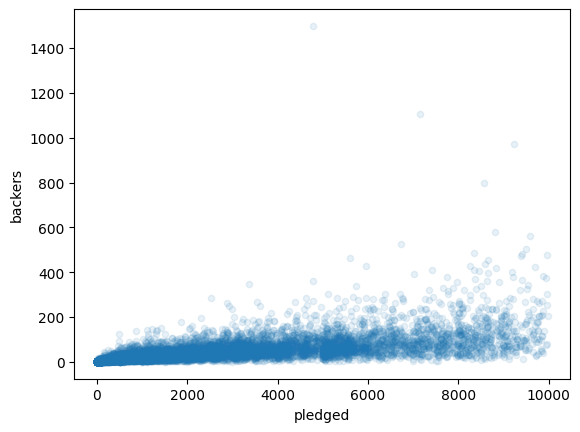

In [68]:
from pandas.plotting import scatter_matrix
%matplotlib inline

df[df['pledged']<10000].plot(kind='scatter', x='pledged', y='backers', alpha=0.1);


> La matrice de corrélation déjà implémentée dans python renvoie un dataframe contenant les coefficients de corrélation de pearson entre chaque variable quantitative et les autres.
>
> Elle est facilement calculable à l'aide de la méthode  **`corr`**.

-   **(e)**  Afficher la matrice de corrélation de  **`df`**.

-   **(f)**  Que pouvez-dire des corrélations entre  **`pledged`**  et  **`goal`**  ? Entre  **`backers`**  et  **`goal`**  ?

In [73]:
df.corr()

ValueError: could not convert string to float: 'The Songs of Adelaide & Abullah'

In [70]:
# Calcul des corrélations de Pearson sur les variables quantitatives
corr = df.corr()

# Affichage de la heatmap de ces corrélations
corr.style.background_gradient(cmap='Reds')

ValueError: could not convert string to float: 'The Songs of Adelaide & Abullah'

### 2. Variables Qualitatives

----------

> Lorsque les variables sont qualitatives, un test de corrélation de Pearson n'est alors pas adapté. Pour cela, on commence par utiliser la  **table de contingence**. On appelle une table de contingence, la table croisée contenant les différentes catégories des deux variables en question.
>
> Pour afficher une table de contingence, il faut utiliser la fonction  **`crosstab`**  avec les deux variables en argument.
>
>    _Exemple d'utilisation_  :  `pandas.crosstab(var1,var2)`
>
> Cette table de contingence permet de visualiser comment se distribuent les catégories de la variable 1 au sein de la variable 2. Pour des variables totalement indépendantes, la distribution doit être proportionnelle entre chaque ligne et entre chaque colonne.

-   (a) Afficher la table de contingence de  **`main_category`**  par rapport à  **`state`**.

In [76]:
table = pd.crosstab(df['main_category'], df['state'])
table

state,failed,successful
main_category,,
Art,881,735
Comics,250,373
Crafts,356,142
Dance,82,126
Design,883,613
Fashion,853,340
Film & Video,1938,1458
Food,969,379
Games,1035,824



> Le test qu'on effectue alors est un  **test du  χ2  par table de contingence**.  
> Pour chaque case d'un tableau, il effectue un test du  χ2  (test de proportions) entre l'effectif de la case et l'effectif total de la colonne.  
> La statistique de test est alors obtenue en faisant la somme de toutes ces statistiques.
>
> Pour ce test, on pose comme hypothèse nulle :
>
> H<sub>0  : "les variables main_category et state sont indépendantes"  
>
> Ce test peut s'effectuer tout simplement grâce à la fonction  **chi2_contingency**  de  **scipy**  appliquée à la table de contingence.  
> Elle renvoie un array de 4 éléments : la statistique du test, la p-value, le degré de liberté et la liste des fréquences attendues. Pour rejeter l'hypothèse nulle, il est nécessaire que la  **p-value**  soit inférieure à 5%.
>
> Vous trouverez le test plus détaillé  [ici](https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2).

-   **(b)**  Importer la fonction  **`chi2_contingency`**.

-   **(c)**  Réaliser le test du  χ2  sur la table de contingence déterminée précédemment.

-   **(d)**  Afficher la statistique du test, la p-value et le degré de liberté.

-   **(e)**  Les variables sont-elles indépendantes ?

In [79]:
from scipy.stats import chi2_contingency
chi2_contingency(table)

Chi2ContingencyResult(statistic=np.float64(893.4442516445133), pvalue=np.float64(1.0959666774863444e-181), dof=14, expected_freq=array([[ 964.2672,  651.7328],
       [ 371.7441,  251.2559],
       [ 297.1566,  200.8434],
       [ 124.1136,   83.8864],
       [ 892.6632,  603.3368],
       [ 711.8631,  481.1369],
       [2026.3932, 1369.6068],
       [ 804.3516,  543.6484],
       [1109.2653,  749.7347],
       [ 145.5948,   98.4052],
       [1509.651 , 1020.349 ],
       [ 365.1804,  246.8196],
       [1247.103 ,  842.897 ],
       [1016.7768,  687.2232],
       [ 347.8761,  235.1239]]))

In [82]:
statistique, pvalue, dof, liste_freq = chi2_contingency(table)
print('statistique =', statistique,',' ,'pvalue = ', pvalue,',' , 'dof =', dof,',' , 'liste_freq =', liste_freq)

statistique = 893.4442516445133 , pvalue =  1.0959666774863444e-181 , dof = 14 , liste_freq = [[ 964.2672  651.7328]
 [ 371.7441  251.2559]
 [ 297.1566  200.8434]
 [ 124.1136   83.8864]
 [ 892.6632  603.3368]
 [ 711.8631  481.1369]
 [2026.3932 1369.6068]
 [ 804.3516  543.6484]
 [1109.2653  749.7347]
 [ 145.5948   98.4052]
 [1509.651  1020.349 ]
 [ 365.1804  246.8196]
 [1247.103   842.897 ]
 [1016.7768  687.2232]
 [ 347.8761  235.1239]]


In [ ]:
# la pvalue est pratiqement egale a 0 et la pvalue ets bien inf a 5 pourcent donc elles sont bien independantes

In [85]:
# Autre methode
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print('statistique =', statistique,'p_valeur = ', p_valeur,'degre_liberte = ', degre_liberte)


statistique = 893.4442516445133 p_valeur =  1.0959666774863444e-181 degre_liberte =  14



Comme pour les variables quantitatives, on peut mesurer le niveau de corrélation entre deux variables qualitatives. Pour cela, on utilise le V de Cramer corrigé pour contrer le biais qui utilise les résultats du test du χ2. Il renvoie une valeur entre 0 et 1.

où :

> -   χ2  est la statistique du test du  χ2.
>
> -   N est le nombre d'observations du jeu de données.
>
> -   k est le nombre de lignes du tableau de contingence.
>
> -   r est le nombre de colonnes du tableau de contingence.

On peut récapituler le test du  χ2 sous forme de tableau :

| Test         | p-value | Décision          | Quantifieur   |
| ------------ | ------- | ----------------- | ------------- |
| Test du khi2 | < 5%    | On rejette H0     |  V de Cramer  |

-   **(f)**  Définir une fonction  **`V_Cramer`**  qui prend en argument un tableau de contingence, le nombre d'observations et renvoie la valeur du V de Cramer. Voir la définition du V de Cramer corrigé pour le biais [ici](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

-   **(g)**  Appliquer  **`V_cramer`**  à  **`table`**  avec le nombre d'observations égale à  `df.shape[0]`.

In [87]:
# @title

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print(V_Cramer(table, df.shape[0]))

0.2097006829012187


**Le V_Cramer n'est pas très élevé.**

On en déduit qu'il n'y a pas une forte corrélation entre les deux variables mais qu'elle n'est pas non plus négligeable.

In [ ]:
# meme si la valeur nest pas tres grande il ya quand meme une correlation entre la categorie principale de votre  et la proba de reusssite


### 3. Variables Quantitatives et Qualitatives

----------

> Une dernière étape consiste à étudier les relations entre variables quantitatives et qualitatives.
>
> Dans ce but, on utilisera l'analyse de la variance (**ANOVA**) à un facteur qui permet de comparer les moyennes d'échantillon. L'objectif de ce test est de conclure sur l'influence d'une variable explicative catégorielle sur la loi d'une variable continue à expliquer.
>
> Considérons la variable catégorielle  **`main_category`**  et la variable numérique  **`pledge`**.  **`main_category`**  compte 15 modalités différentes. On définit les moyennes   μ₁, μ₂, ..., μ₁₅ qui correspondent à la moyenne des sommes collectées (**`pledged`**) pour chacune des 15 modalités. Le raisonnement simple que l'on fait avec ANOVA est que si la variable  **`main_category`**  n'a pas d'incidence sur  **`pledged`**, la moyenne devrait être identique pour les 15 modalités soient   μ₁ = μ₂ = ... = μ₁₅.
>
> On définit donc l'hypothèse nulle :
>
> H<sub>0</sub> : μ₁ = μ₂ = ... = μ₁₅
>
> Dans la pratique la méthode  **ANOVA**  s'intéresse à la variation interclasse, intraclasse et à la variation totale notées respectivement SCE, SCR et SCT.
>
> > Il est connu que cette statistique suit une loi de Fisher de paramètre (k-1, n-k). En s'appuyant sur la valeur de cette statistique et de la  **p-value**  associé, on peut conclure sur l'influence ou non de la variable  **`main_category`**  sur la variable  **`pledged`**.
>
> On rejette  H<sub>0</sub> si la p-value est inférieure à 5%. Rejeter  H<sub>0</sub>  signifie ici rejeter l'hypothèse selon laquelle  **`main_category`**  n'influe pas sur  **`pledged`**.
>
> On peut effectuer une analyse de la variance (**ANOVA**) à un facteur via le module  **`statsmodels`**  et visualiser la  **p-value**  et la statistique de Fisher dans un DataFrame.
>
+  **(a)**  Importer le module  **`statsmodels.api`**.

-   **(b)**  Via l'utilisation d'ANOVA étudier la relation entre  **`pledged`**  et  **`main_category`**.

-   **(c)**  Afficher les résultats, observer la p_value (PR>F) et conclure.


*Exemple d'utilisation :  `result = statsmodels.formula.api.ols('var_num ~ var_cat', data = df).fit()  table = statsmodels.api.stats.anova_lm(result)`*

In [92]:
'''Faire des recherches par rapport sur cela
.....
rechercher statstmodels et ANOVA
'''
import statsmodels.api

result = statsmodels.formula.api.ols('pledged ~ main_category', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table

ModuleNotFoundError: No module named 'statsmodels'


Récapitulons dans un tableau les différents outils :

| Cas                        | Test/Méthode     | p-value | Décision           | Quantifieur         |
| -------------------------- | ---------------- | ------- | ------------------ | ------------------- |
| 2 variables continues      | Test de Pearson  | < 5%    | Pas indépendantes  | Coefficient de Pearson |
| 2 variables catégorielles  | Test du khi2     | < 5%    | Pas indépendantes  | V de Cramer          |
| variable catégorielle et continue | ANOVA    | < 5%    | Pas indépendantes  |                     |



Afin de conclure lors d'une analyse d'un test ANOVA, nous préfèrerons dire que  **"les modalités testées ont un effet statistique significatif sur la variable cible"**  plutôt que "pas indépendantes".

# L'EDA en Low Code
-----
Tout ce qui va suivre n'est pas disponible sur la version 3.13 de python mais au MAX la version 3.12

In [101]:
!pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.12.1 Requires-Python <3.13,>=3.7; 4.12.2 Requires-Python <3.13,>=3.7; 4.13.0 Requires-Python <3.13,>=3.7; 4.14.0 Requires-Python <3.13,>=3.7; 4.15.0 Requires-Python <3.13,>=3.7; 4.15.1 Requires-Python <3.13,>=3.7; 4.16.0 Requires-Python <3.13,>=3.7; 4.16.1 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python

In [97]:
!pip install --upgrade typing-extensions

ModuleNotFoundError: No module named 'ydata_profiling'

In [102]:
from ydata_profiling import ProfileReport


3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]


In [108]:
profile = ProfileReport(df, title="Report Kickstarter")

NameError: name 'ProfileReport' is not defined

In [109]:
profile.to_widgets()

NameError: name 'profile' is not defined

In [ ]:
profile.to_notebook_iframe()

In [110]:
profile.to_file("Report Kickstarter.html")

NameError: name 'profile' is not defined

In [111]:
from google.colab import files

# Télécharger le fichier HTML localement
files.download("Report Kickstarter.html")

ModuleNotFoundError: No module named 'google'